In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print("{} shape is: {}".format("x_train", x_train.shape))
print("{} shape is: {}".format("y_train", y_train.shape))
print("{} shape is: {}".format("x_test", x_test.shape))
print("{} shape is: {}".format("y_test", y_test.shape))

x_train shape is: (50000, 32, 32, 3)
y_train shape is: (50000, 1)
x_test shape is: (10000, 32, 32, 3)
y_test shape is: (10000, 1)


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

array([0], dtype=uint8)

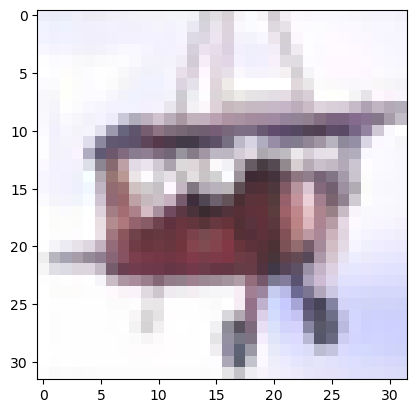

In [7]:
plt.imshow(x_train[4563])
y_train[4563]

## Scalling the samples

In [8]:
x_train =  x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## One hot encoding the lables

In [16]:
y_train_categoricals = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
y_train_categoricals[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1500, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid'),
])

In [14]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train_categoricals, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 362s 231ms/step - loss: 1.8908 - accuracy: 0.3259
Epoch 2/50
1563/1563 [==============================] - 361s 231ms/step - loss: 1.6647 - accuracy: 0.4030
Epoch 3/50
1563/1563 [==============================] - 357s 228ms/step - loss: 1.5915 - accuracy: 0.4294
Epoch 4/50
1563/1563 [==============================] - 355s 227ms/step - loss: 1.5444 - accuracy: 0.4476
Epoch 5/50
1563/1563 [==============================] - 360s 230ms/step - loss: 1.5063 - accuracy: 0.4601
Epoch 6/50
1563/1563 [==============================] - 356s 228ms/step - loss: 1.4817 - accuracy: 0.4682
Epoch 7/50
1563/1563 [==============================] - 355s 227ms/step - loss: 1.4584 - accuracy: 0.4764
Epoch 8/50
1563/1563 [==============================] - 354s 227ms/step - loss: 1.4335 - accuracy: 0.4835
Epoch 9/50
1563/1563 [==============================] - 357s 228ms/step - loss: 1.4131 - accuracy: 0.4917
Epoch 10/50
1563/1563 [=======================

In [18]:
model.evaluate(x_test, y_test_categorical)
y_predicted =  model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [48]:
cnn_model = keras.Sequential([
    ##Convolution Layers:
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= (32,32,3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    ##DenseLayers:
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5), #Dropout regularization
    keras.layers.Dense(250, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax'),
])

In [49]:
cnn_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn_model.fit(x_train, y_train_categoricals, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4799 - accuracy: 0.4614
Epoch 2/50
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1529 - accuracy: 0.5929
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0179 - accuracy: 0.6416
Epoch 4/50
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9234 - accuracy: 0.6735
Epoch 5/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8540 - accuracy: 0.7005
Epoch 6/50
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7969 - accuracy: 0.7192
Epoch 7/50
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7357 - accuracy: 0.7395
Epoch 8/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6856 - accuracy: 0.7578
Epoch 9/50
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6363 - accuracy: 0.7721
Epoch 10/50
1563/1563 [==============================] - 61s 39m

In [50]:
cnn_model.evaluate(x_test, y_test_categorical)
y_predicted =  cnn_model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


#### The training accuracy is much greater tha the test accuracy for about an 23%. It can be understood that model is overfit. As there is no augmented data used for training the model, the model tend to overfit. 

In [51]:
y_predicted.shape

(10000, 10)

In [52]:
y_predicted[0]

array([0.02214972, 0.00433534, 0.00268314, 0.19594394, 0.00274738,
       0.6526068 , 0.01825264, 0.00122016, 0.09029397, 0.00976688],
      dtype=float32)

In [54]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred[:10]

[5, 8, 8, 0, 6, 6, 3, 6, 3, 1]

In [55]:
y_test_reshaped = y_test.reshape(-1)
y_test_reshaped

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test_reshaped, y_pred ))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1000
           1       0.81      0.85      0.83      1000
           2       0.68      0.51      0.58      1000
           3       0.48      0.48      0.48      1000
           4       0.64      0.69      0.67      1000
           5       0.59      0.60      0.59      1000
           6       0.74      0.83      0.78      1000
           7       0.77      0.75      0.76      1000
           8       0.82      0.82      0.82      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [59]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [69]:
cnn_model_aug = keras.Sequential([
    
    data_augmentation,
    
    ##Convolution Layers:
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= (32,32,3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    ##DenseLayers:
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.5), #Dropout regularization
    keras.layers.Dense(800, activation= 'relu'),
    keras.layers.Dropout(0.5), #Dropout regularization
    keras.layers.Dense(10, activation= 'softmax'),
])

In [70]:
cnn_model_aug.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn_model_aug.fit(x_train, y_train_categoricals, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 182s 113ms/step - loss: 1.6822 - accuracy: 0.3711
Epoch 2/50
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4124 - accuracy: 0.4908
Epoch 3/50
1563/1563 [==============================] - 183s 117ms/step - loss: 1.2986 - accuracy: 0.5402
Epoch 4/50
1563/1563 [==============================] - 214s 137ms/step - loss: 1.2361 - accuracy: 0.5642
Epoch 5/50
1563/1563 [==============================] - 178s 114ms/step - loss: 1.1918 - accuracy: 0.5832
Epoch 6/50
1563/1563 [==============================] - 149s 95ms/step - loss: 1.1559 - accuracy: 0.5951
Epoch 7/50
1563/1563 [==============================] - 197s 126ms/step - loss: 1.1269 - accuracy: 0.6067
Epoch 8/50
1563/1563 [==============================] - 183s 117ms/step - loss: 1.1011 - accuracy: 0.6165
Epoch 9/50
1563/1563 [==============================] - 147s 94ms/step - loss: 1.0855 - accuracy: 0.6243
Epoch 10/50
1563/1563 [=========================

In [71]:
cnn_model_aug.evaluate(x_test, y_test_categorical)
y_predicted =  cnn_model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [72]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test_reshaped, y_pred ))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1000
           1       0.81      0.85      0.83      1000
           2       0.68      0.51      0.58      1000
           3       0.48      0.48      0.48      1000
           4       0.64      0.69      0.67      1000
           5       0.59      0.60      0.59      1000
           6       0.74      0.83      0.78      1000
           7       0.77      0.75      0.76      1000
           8       0.82      0.82      0.82      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

